# Frame of reference w.r.t Momentum
Many times a complicated set of interactions can be simplified by choosing a different point of view. We saw this in the frames of reference movie.

## Simple example from class:


We had two objects coming at one another and were asked to make a prediction on the result of the collision given that the interaction was entirely elastic.

We know from a previous assignment that the collision between one object moving to collide with a stationary object can be predicted readily from conservation of both momentum (always true) and kinetic enegy (true for elastic collisions.) Note that energy as a whole is always conserved but maintaining it all in Kinetic Energy is unique to elastic interactions.

For two masses $m_A$ and $m_B$ with $m_A$ coming in to collide with a stationary $m_B$ with an initial velocity of $v_{Ai}$, we predict the final velocities of the two objects to be 
$$v_{Af} = \frac{m_A-m_B}{m_A+m_B}v_{Ai}$$
and 
$$v_{Bf} = \frac{2\;m_A}{m_A+m_B}v_{Ai}$$

But what if $m_B$ also has a non-zero velocity?
ans: Shift the reference frame to one where mass B is stationary.

Algorithmically it looks like this
```python
# Initial conditions
mA  = ###.##    # kg
vAi = ###.##    # kg 

mB  = ###.##    # m/s
vBi = ###.##    # m/s


# Subract B's velocity from all the other velocities to 
# obtain the velocities in the prime coordinate moving at vBi...
vAip = vAi - vBi
vBip = vBi - vBi  # just for formality in the process 0 is the result

# predict the final velocities...
vAfp = (mA - mB) / (mA + mB) * vAip
vBfp = (2 * mA) / (mA + mB) * vAip

# add the frame of reference velocity back in to shift back to the 
# lab coordinate...
vAf = vAfp + vBi
vBf = vBfp + vBi

#Q.E.D.
```
Don't forget to print the result and see if it matches prediction with [the simulator](https://phet.colorado.edu/sims/html/collision-lab/latest/collision-lab_all.html).

## Is there another way?

There are no prefered reference points in physics.  There are, however, some that make calculations easier.  Consider what happens with the center of mass reference point.  If you play with [the simulator](https://phet.colorado.edu/sims/html/collision-lab/latest/collision-lab_all.html) and turn on the 'center of mass' indicator you may notice an interesting perspecitve as the collision takes place.  

To keep things simple I'll write an expression for 2 particles but this could be true for 200 or 2M
<!--
$$
r_{cm}(t) = \sum_{i=1}^{N}m_i\;r_i / m_T \tag{1.1}\\
\text{where }m_T = \sum_{i=1}^{N}m_i$$
\text{where }m_T = \sum_{i=1}^{N}m_i
$$
-->

$$r_{cm}(t) = (m_A\;r_A + m_B\;r_B) / m_T \tag{1.1}\\
\text{where }m_T = m_A + m_B$$

where I have explicitly reminded you that the $r_{cm}$ is a function of time.  This means that we can also calculate the $v_{cm}$ from this formula as well...
$$
\begin{align}
\frac{\mathbb{d}}{\mathbb{d}t}r_{cm}(t) &= (m_A\;\frac{\mathbb{d}}{\mathbb{d}t}r_A + m_B\;\frac{\mathbb{d}}{\mathbb{d}t}r_B) / m_T\\
v_{cm}(t) &= (m_A\;v_A + m_B\;v_B) / m_T \tag{1.2}\\
\text{where }m_T = m_A + m_B
\end{align}
$$
But wait, you say, if I multiply both sides by $m_T$ don't I get that the total momentum of the particles (whether there are 2 or 2M) is given by the sum of the individual momenta...
$$
m_T \;v_{cm}(t) = p_T = (p_A + p_B)  \tag{1.3}
$$
The significance of the center of mass (CoM) frame of reference is that if I subtract the CoM velocity (a Galilean Transformation) from all the velocities I have partitioned the  perspective into two points of view: The one that it is centered on the weighted average of where all the particles are (internal) and the motion of the collective whole (external).  **The internal momentum from the CoM perspective is zero.  The external momentum is the average of all the individual momenta.** Think of a basketball being tossed from one person to another. We can consider the momentum of the ball and the bajillion air molecules within being a combination of the external momentum of the ball and its contents as a whole and standing in the ball and watching the air molecules bouncing around inside.
<!--
$$
\frac{\mathbb{d}}{\mathbb{d}t}r_{cm}(t) = v_{cm}(t) = \sum_{i=1}^{N}m_i\;\frac{\mathbb{d}}{\mathbb{d}t}r_i / m_T \tag{1.1}$$
-->


Lets use this to predict the result we saw above.
```python
# Initial conditions
mA  = ###.##    # kg
vAi = ###.##    # kg 

mB  = ###.##    # m/s
vBi = ###.##    # m/s

# Determine the CoM velocity
vCoM = (mA * vAi + mB * vBi)/(mA + mB)

# Subract CoM velocity from all the other velocities to 
# obtain the velocities in the prime coordinate moving at vCoM...
vAip = vAi - vCoM
vBip = vBi - vCoM  # just for formality in the process 0 is the result

# Calculate the internal momentum...
pAi = mA * vAip
pBi = mB * vBip

# The momentum before has to add up to the momentum after. The
# only reasonable way to satisfy the Conservation of momentum AND
# conservation of kinetic energy is to simply swap the momentum
pAf = pBi  # A winds up with B's momenutm after the collision
pBf = pAi  # B winds up with A's momenutm after the collision

# divide by the mass of each particle to get the CoM final velocities
vAfp = pAf / mA
vBfp = pBf / mB

# add the frame of reference velocity back in to shift back to the 
# lab coordinate...
vAf = vAfp + vCoM
vBf = vBfp + vCom
#Q.E.D.

# Print out our predictions...
print(f"For colliding masses {mA:5.2f} kg and {mB:5.2f} kg")
print(f"  coming at each other with velocity of {vAi:5.2f} m/s {vBi:5.2f} m/s")
print(f"  we predict the final velocity of mA to be {vAf:5.2f} m/s and mB to be {vBf:5.2f} m/s")
```
Try making some predictions of head on collisions with [the simulator](https://phet.colorado.edu/sims/html/collision-lab/latest/collision-lab_all.html).

In [ ]:
#@title Put your calculation here

## What about 2 dimensions?
The above should work for 2 dimensions as well, shouldn't it?  With the numpy library we don't even have to change the algorithm just store the components in arrays. $v_\#$ becomes $\vec{v_\#}$ and so on with all the vector quantities. There is one additional consideration.

**Angular Momentum**
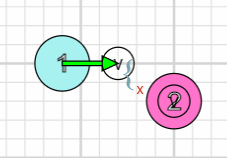
When moving in 2 or three dimensions colliding particles can carry angular momentum even if they are not spinning themselves. This comes about if one particle is hitting another "off-axis". As illustrated, this is when the center of mass velocity is not colinear with a vector from the center of the colliding particle and the center of mass. Fortunately even though the vector aligning the CoM location is changing as the particles move, the offset remains constant throughout the interaction. It is best characterised as the sine of the angle between the CoM position and the velocity vector or stated in a nice compact formula:

$$L_A = m_A \;\left(\vec{r}_A - \vec{r}_{cm}\right) \times \vec{v}_A$$
$$L_B = m_B \;\left(\vec{r}_B - \vec{r}_{cm}\right) \times \vec{v}_B$$


$$L = m_A \;\left(\vec{r}_A - \vec{r}_{cm}\right) \times \left(\vec{v}_A - \vec{v}_{cm}\right)$$


Simply stated, if the sum of the first two quantities is 0 (or the one calculation based on the CoM frame is 0), meaning that the collision does not have any angular momentum based on the collision geometry (quite a mouthful), then the above calculation will predict the final velocities.


In [31]:
import numpy as np

# Initial conditions
mA  = 0.5   # kg
rAi = np.array([-1.00, -0.27]) # m
vAi = np.array([ 1.31,  0.30])  # m/s 

mB  = 1.5   # kg
rBi = np.array([ 0.00,  0.50]) # m
vBi = np.array([ 0.31, -0.47])  # m/s

print(f"For colliding masses {mA:5.2f} kg and {mB:5.2f} kg")

# Determine the CoM velocity 
vCoM = (mA * vAi + mB * vBi)/(mA + mB)
print(f"The center of mass velocity is {vCoM} m/s")

# Initial Com of the colliding objects
# while this changes, the offset of a velocity from this stays constant
rCoM = (mA * rAi + mB * rBi)/(mA + mB)
# Calculate the intrinsict angular momentum of the collision See Notes
LA = mA*np.cross(rAi-rCoM, vAi)
LB = mB*np.cross(rBi-rCoM, vBi)
L  = mA*np.cross(rAi-rCoM, vAi - vCoM) # angular momentum of whole system

print(f"\tangMomA: {LA:6.3f} kg m^2/s")
print(f"\tangMomB: {LB:6.3f} kg m^2/s")
print(f"\tangMom: {L:6.3f} kg m^2/s")

print()

# test to see if the total angular momentum of the system is 0
if abs(LB+LA)>0.01:
  print("!!! Prediction might not match results !!!")

# Subract CoM velocity from all the other velocities to 
# obtain the velocities in the prime coordinate moving at vCoM...
vAip = vAi - vCoM
vBip = vBi - vCoM  # now we need to do this.

# Calculate the internal momentum...
pAi = mA * vAip
pBi = mB * vBip

# The momentum before has to add up to the momentum after. The
# only reasonable way to satisfy the Conservation of momentum AND
# conservation of kinetic energy is to simply swap the momentum
pAf = pBi  # A winds up with B's momenutm after the collision
pBf = pAi  # B winds up with A's momenutm after the collision

# divide by the mass of each particle to get the CoM final velocities
vAfp = pAf / mA
vBfp = pBf / mB

# add the frame of reference velocity back in to shift back to the 
# lab coordinate...
vAf = vAfp + vCoM
vBf = vBfp + vCoM

#Q.E.D.
print(f"  coming at each other with an initial velocity of \n\tmA: {vAi} m/s and \n\tmB: {vBi} m/s")
print(f"  we predict the final velocity of \n\tmA to be {vAf} m/s and \n\tmB to be {vBf} m/s")

For colliding masses  0.50 kg and  1.50 kg
The center of mass velocity is [ 0.56   -0.2775] m/s
	angMomA:  0.266 kg m^2/s
	angMomB: -0.266 kg m^2/s
	angMom:  0.000 kg m^2/s

  coming at each other with an initial velocity of 
	mA: [1.31 0.3 ] m/s and 
	mB: [ 0.31 -0.47] m/s
  we predict the final velocity of 
	mA to be [-0.19  -0.855] m/s and 
	mB to be [ 0.81  -0.085] m/s


Interesting result. With Hard Sphere collisions (both the **PhET** and **IP2000**) show that this method of calculation only works if the collision has no angular momentum.  A trick with the simulator is, regardless of the position of the colliding spheres overlap the velocity vectors to point from the object to a common collision point. This guarantees that the centers of the objects will collide on center with no spin.  *Obviously if both the velocity vectors are then scaled back by a constant amount this also works.  The best test is to calculate the angular momentum relative to the CoM*

In [25]:
deltaR = rBi - rAi
deltaV = vBi - vAi
rCoM = (mA * rAi + mB * rBi)/(mA + mB)

def vecAngle(v1,v2):
  return np.rad2deg(np.arccos( np.dot(v1, v2)/(np.dot(v1,v1)*np.dot(v2,v2)) ) )


print(f"angMomA: {mA*np.cross(vAf, rAi-rCoM)}")
print(f"angMomB: {mB*np.cross(vBf, rBi-rCoM)}")



angMomA: -0.248625
angMomB: 0.173625
